In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic') #한글 폰트 적용시

In [2]:
import pandas as pd
import geopandas as gpd

c:\Users\leesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
# 종분포 데이터
gdf_pt = gpd.read_file('../data/geo_mbris_obis_edu_light.gpkg', encoding="UTF-8")
gdf_pt.info()
gdf_pt.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 220833 entries, 0 to 220832
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   spc_scitf_nm  220833 non-null  object  
 1   comm_kor_nm   163598 non-null  object  
 2   genus         220681 non-null  object  
 3   genus_nm      164667 non-null  object  
 4   family        220727 non-null  object  
 5   family_nm     163772 non-null  object  
 6   order_        220742 non-null  object  
 7   order_nm      162672 non-null  object  
 8   class         220809 non-null  object  
 9   class_nm      171786 non-null  object  
 10  phylum        220811 non-null  object  
 11  phylum_nm     206406 non-null  object  
 12  kingdom       220833 non-null  object  
 13  kingdom_nm    220833 non-null  object  
 14  lati_val      220833 non-null  float64 
 15  loti_val      220833 non-null  float64 
 16  col_bg_dt     220833 non-null  object  
 17  ssea_id       220833 

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
0,Mucor circinelloides,None,Mucor,None,Mucoraceae,None,Mucorales,None,Mucoromycetes,None,...,None,Fungi,균계,38.481861,128.438194,20160802,EM,5055-3,mbris,POINT (128.43819 38.48186)
1,Paralinhomoeus gerlachi,None,Paralinhomoeus,None,Linhomoeidae,None,Monhysterida,None,Chromadorea,None,...,선형동물문,Animalia,동물계,38.269869,128.557564,20160415,EM,55-4,mbris,POINT (128.55756 38.26987)
2,Aplysia kurodai,군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,None,Gastropoda,복족강,...,연체동물문,Animalia,동물계,38.271903,128.558261,20190522,EM,55-4,mbris,POINT (128.55826 38.27190)
3,Botrytis cinerea,None,Botrytis,None,Sclerotiniaceae,None,Helotiales,None,Leotiomycetes,None,...,None,Fungi,균계,38.153361,128.608306,19000100,EM,55-7,mbris,POINT (128.60831 38.15336)
4,Trichoderma,None,Trichoderma,None,Hypocreaceae,None,Hypocreales,None,Sordariomycetes,None,...,None,Fungi,균계,37.858556,128.854389,20160926,EM,62-3,mbris,POINT (128.85439 37.85856)


### 종분포와 해양생물해역을 공간조인

In [4]:
# 해양생물해역
gdf_area = gpd.read_file('../data/geo_zn_ocn_lvb_sarea.shp', encoding="UTF-8")
gdf_area.info()
gdf_area.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         5 non-null      int64   
 1   sarea_korn  5 non-null      object  
 2   ssea_id     5 non-null      object  
 3   geometry    5 non-null      geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 292.0+ bytes


,gid,sarea_korn,ssea_id,geometry
0,5,동해남부,ES,"POLYGON ((129.66570 35.06455, 129.40532 34.971..."
1,4,남해동부,SE,"POLYGON ((127.82165 33.16382, 127.80000 33.121..."
2,3,서해,W,"POLYGON ((127.00000 38.00000, 127.00000 35.300..."
3,2,남해서부,SW,"POLYGON ((126.27256 30.28900, 126.21167 30.271..."
4,1,동해중부,EM,"POLYGON ((132.14285 36.50000, 129.30000 36.500..."


In [5]:
# 종분포(포인트)에  해양물리를 공간조인  
gdf_pt2 = gpd.sjoin(gdf_pt, gdf_area )
gdf_pt2.info()
gdf_pt2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 220833 entries, 0 to 220832
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   spc_scitf_nm   220833 non-null  object  
 1   comm_kor_nm    163598 non-null  object  
 2   genus          220681 non-null  object  
 3   genus_nm       164667 non-null  object  
 4   family         220727 non-null  object  
 5   family_nm      163772 non-null  object  
 6   order_         220742 non-null  object  
 7   order_nm       162672 non-null  object  
 8   class          220809 non-null  object  
 9   class_nm       171786 non-null  object  
 10  phylum         220811 non-null  object  
 11  phylum_nm      206406 non-null  object  
 12  kingdom        220833 non-null  object  
 13  kingdom_nm     220833 non-null  object  
 14  lati_val       220833 non-null  float64 
 15  loti_val       220833 non-null  float64 
 16  col_bg_dt      220833 non-null  object  
 17  ssea_id

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,loti_val,col_bg_dt,ssea_id_left,sstrnc_no,kind,geometry,index_right,gid,sarea_korn,ssea_id_right
0,Mucor circinelloides,None,Mucor,None,Mucoraceae,None,Mucorales,None,Mucoromycetes,None,...,128.438194,20160802,EM,5055-3,mbris,POINT (128.43819 38.48186),4,1,동해중부,EM
1,Paralinhomoeus gerlachi,None,Paralinhomoeus,None,Linhomoeidae,None,Monhysterida,None,Chromadorea,None,...,128.557564,20160415,EM,55-4,mbris,POINT (128.55756 38.26987),4,1,동해중부,EM
2,Aplysia kurodai,군소,Aplysia,군소속,Aplysiidae,군소과,Aplysiida,None,Gastropoda,복족강,...,128.558261,20190522,EM,55-4,mbris,POINT (128.55826 38.27190),4,1,동해중부,EM
3,Botrytis cinerea,None,Botrytis,None,Sclerotiniaceae,None,Helotiales,None,Leotiomycetes,None,...,128.608306,19000100,EM,55-7,mbris,POINT (128.60831 38.15336),4,1,동해중부,EM
4,Trichoderma,None,Trichoderma,None,Hypocreaceae,None,Hypocreales,None,Sordariomycetes,None,...,128.854389,20160926,EM,62-3,mbris,POINT (128.85439 37.85856),4,1,동해중부,EM


### 해양생물해역별 종별 개체 수 집계

In [6]:
# 해양생물해역 - 종별 건수 집계
df_size = gdf_pt2.groupby(['sarea_korn', 'spc_scitf_nm'], as_index=False ).size() 
df_size.info()
df_size.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17249 entries, 0 to 17248
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sarea_korn    17249 non-null  object
 1   spc_scitf_nm  17249 non-null  object
 2   size          17249 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 404.4+ KB


,sarea_korn,spc_scitf_nm,size
0,남해동부,Ablennes hians,7
1,남해동부,Abludomelita,2
2,남해동부,Abudefduf notatus,1
3,남해동부,Abudefduf sordidus,1
4,남해동부,Acanthochitona achates,4


In [7]:
# 종-해역별 건수를 좀 더 쉽게 보기 위해 피벗
df_pivot = df_size.pivot(index='spc_scitf_nm', columns='sarea_korn', values='size') #.reset_index()
df_pivot.info()
df_pivot.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8856 entries, Aaosphaeria arxii to Zymoseptoria tritici
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   남해동부    2962 non-null   float64
 1   남해서부    5062 non-null   float64
 2   동해남부    1801 non-null   float64
 3   동해중부    3471 non-null   float64
 4   서해      3953 non-null   float64
dtypes: float64(5)
memory usage: 415.1+ KB


sarea_korn,남해동부,남해서부,동해남부,동해중부,서해
spc_scitf_nm,,,,,
Aaosphaeria arxii,NaN,1.0,1.0,NaN,NaN
Abelbolla boucheri,NaN,NaN,NaN,NaN,2.0
Abelbolla maemulensis,NaN,NaN,NaN,NaN,1.0
Ablennes hians,7.0,4.0,1.0,1.0,NaN
Abludomelita,2.0,NaN,NaN,NaN,NaN


In [8]:
# 피벗 정렬
df_pivot2 = df_pivot.sort_values(by=(['남해동부','남해서부','동해남부','동해중부','서해'] ), ascending=False)
df_pivot2.head()

sarea_korn,남해동부,남해서부,동해남부,동해중부,서해
spc_scitf_nm,,,,,
Thalassiosira,595.0,71.0,36.0,NaN,82.0
Coscinodiscus,539.0,99.0,59.0,NaN,79.0
Chaetoceros,375.0,80.0,45.0,4.0,60.0
Ulva australis,309.0,391.0,362.0,252.0,406.0
Sargassum fusiforme,210.0,581.0,39.0,64.0,187.0


In [9]:
import seaborn as sns

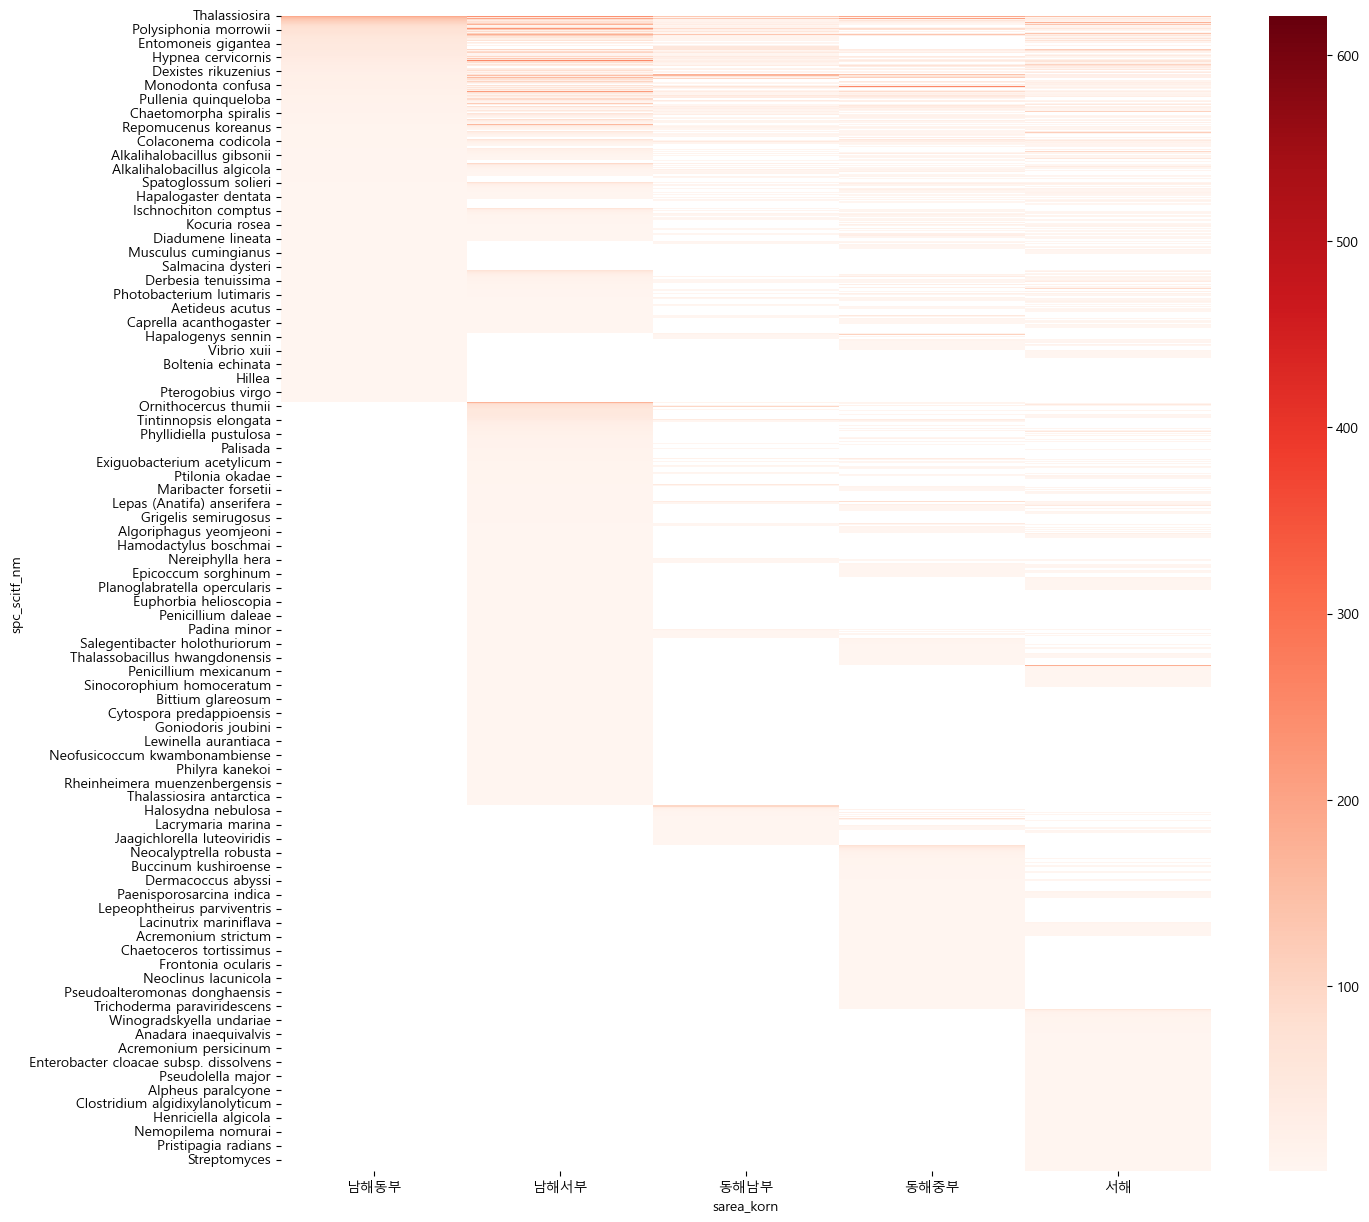

In [16]:
# 히트맵 시각화  
plt.rcParams['figure.figsize'] = [15, 15]
ax = sns.heatmap(df_pivot2, cmap="Reds" )

In [11]:
!pip install missingno

In [12]:
import missingno as msno

<Axes: >

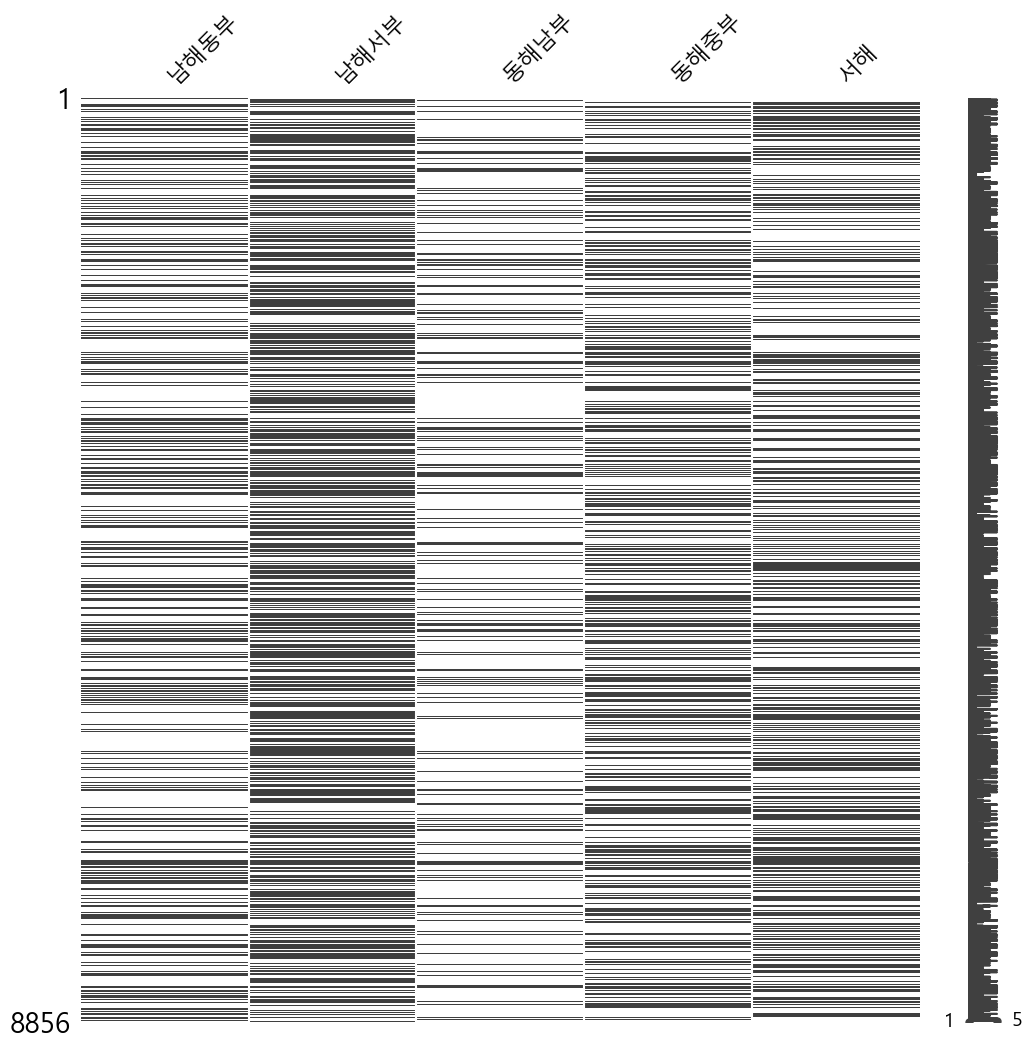

In [13]:
msno.matrix(df_pivot,figsize=(12,12))

In [14]:
# 집계 결과를 csv로 저장 
df_pivot.to_csv('result/df_pivot.csv', encoding='UTF-8')

In [15]:
# 남해동부에만 분포하고, 다른 해역에는 분포하지 않는 데이터
df_pivot3 = df_pivot[ (df_pivot.notnull()['남해동부']) & (df_pivot.isnull()['남해서부']) & (df_pivot.isnull()['동해남부']) 
                     & (df_pivot.isnull()['동해중부']) & (df_pivot.isnull()['서해']) ]
df_pivot3.info()
df_pivot3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, Abludomelita to Zostera caespitosa
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   남해동부    532 non-null    float64
 1   남해서부    0 non-null      float64
 2   동해남부    0 non-null      float64
 3   동해중부    0 non-null      float64
 4   서해      0 non-null      float64
dtypes: float64(5)
memory usage: 24.9+ KB


sarea_korn,남해동부,남해서부,동해남부,동해중부,서해
spc_scitf_nm,,,,,
Abludomelita,2.0,NaN,NaN,NaN,NaN
Acanthochitona byungdoni,4.0,NaN,NaN,NaN,NaN
Acanthogorgia densiflora,1.0,NaN,NaN,NaN,NaN
Acanthogorgia radians,1.0,NaN,NaN,NaN,NaN
Acanthogorgiidae,2.0,NaN,NaN,NaN,NaN
